# **Social Network Analysis | Datmin II Week 7**

**Nama : Wanda Desi R**

**NIM: 164221026**

In [1]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


## Python Package

In [2]:
import re
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from transformers import pipeline
from sklearn.metrics import silhouette_score
from operator import itemgetter
import keras


## Crawl twitter

In [2]:
# Twitter auth token
twitter_auth_token = '' # buka inspect > application > cookies > folder x.com

In [17]:
# Crawl tweet
twitter_auth_token = ''#memasukan token
filename = 'pertamina.csv'#nama file hasil crawl
search_keyword = 'pertamina until:2025-09-27 since:2025-06-01 lang:id' # topiknya pertamina
limit = 1000#limit tweet yang diambil

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/pertamina.csv, renaming to ./tweets-data/pertamina.old.csv

Filling in keywords: pertamina until:2025-09-27 since:2025-06-01 lang:id


-- Scrolling... (1)

Your tweets saved to: c:\Users\User\OneDrive\Documents\Tugas_Kefas\Semester 5\Data Mining II\TM 7\tweets-data\pertamina.csv
Total tweets saved: 20

-- Scrolling... (1)

Your tweets saved to: c:\Users\User\OneDrive\Documents\Tugas_Kefas\Semester 5\Data Mining II\TM 7\tweets-data\pertamina.csv
Total tweets saved: 39


Your tweets saved to: c:\Users\User\OneDrive\Documents\Tugas_Kefas\Semester 5\Data Mining II\TM 7\tweets-

[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result
[v2.6.1] No more tweets found, please check your search criteria and csv file result


In [18]:
filename = 'pertamina2.csv'
search_keyword = 'bensin kosong until:2025-09-27 since:2025-06-01 lang:id'
limit = 1000

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Found existing file ./tweets-data/pertamina2.csv, renaming to ./tweets-data/pertamina2.old.csv

Filling in keywords: bensin kosong until:2025-09-27 since:2025-06-01 lang:id


-- Scrolling... (1)

Your tweets saved to: c:\Users\User\OneDrive\Documents\Tugas_Kefas\Semester 5\Data Mining II\TM 7\tweets-data\pertamina2.csv
Total tweets saved: 18

-- Scrolling... (1)

Your tweets saved to: c:\Users\User\OneDrive\Documents\Tugas_Kefas\Semester 5\Data Mining II\TM 7\tweets-data\pertamina2.csv
Total tweets saved: 38


Your tweets saved to: c:\Users\User\OneDrive\Documents\Tugas_Kefas\Semester 5\Data Mining II\TM 7

[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@1f09e790c859e9f460722df7b6e32449"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@7616d3c346ebb26f2ca7dbc9522a01d4"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@6fc320cbdbc5575c4e816f3e73de9563"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Error parsing response json: {"_type":"Response","_guid":"response@a2dbca6a389aa077ddf85dc5e27158eb"}
[v2.6.1] Most likely, you have already exceeded the Twitter rate limit. Read more on https://x.com/elonmusk/status/1675187969420828672.
[v2.6.1] Err

In [3]:
file_path = f"tweets-data/{'pertamina.csv'}"
df1= pd.read_csv(file_path, delimiter=",")#membaca file csv
# menampilkan DataFrame
display(df1)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1969991574177337643,Fri Sep 26 23:55:39 +0000 2025,0,@yogi_Halim @bradil93 @nizarbk3 @PresidenKopi ...,1971725385659568302,NaN,yogi_Halim,in,NaN,0,0,0,https://x.com/undefined/status/197172538565956...,1651205161329606662,NaN
1,1971725221150462400,Fri Sep 26 23:55:00 +0000 2025,1,Vivo serap 40 ribu barel BBM yang diimpor Pert...,1971725221150462400,NaN,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172522115046...,121640063,NaN
2,1971519469060317476,Fri Sep 26 23:52:45 +0000 2025,0,@_BangFu Saking nge gasnya stock bbm swasta ko...,1971724657347920077,NaN,_BangFu,in,NaN,0,0,0,https://x.com/undefined/status/197172465734792...,1527076193253859328,NaN
3,1971724546790314236,Fri Sep 26 23:52:19 +0000 2025,0,Kebijaksanaan pemerintah mematikan usaha yang ...,1971724546790314236,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197172454679031...,4779772152,NaN
4,1971724401055064403,Fri Sep 26 23:51:44 +0000 2025,0,Pertamina Grand Prix of Indonesia 2025 Segera ...,1971724401055064403,https://pbs.twimg.com/media/G1z4rB6aUAAVISt.png,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172440105506...,811897280563290112,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1971575848471011383,Fri Sep 26 14:01:27 +0000 2025,0,Sebagai pelanggan setia shell ikut sedih tapi ...,1971575848471011383,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197157584847101...,1234919472202317825,NaN
305,1971575736323772417,Fri Sep 26 14:01:00 +0000 2025,0,Waaah balik ke pertamina lagi,1971575736323772417,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197157573632377...,74379565,NaN
306,1971560392456597794,Fri Sep 26 14:00:19 +0000 2025,0,@Me_LiverpoolFC @Ary_PrasKe2 Sebetulnya bagi S...,1971575565556883951,NaN,Me_LiverpoolFC,in,NaN,0,2,0,https://x.com/undefined/status/197157556555688...,1964748001,NaN
307,1971536788423598414,Fri Sep 26 13:59:57 +0000 2025,27,@menbungforlife @salam4jari kakkkk emang kalo ...,1971575471851925876,NaN,menbungforlife,in,NaN,0,0,1,https://x.com/undefined/status/197157547185192...,1133332385443958785,NaN


In [4]:
file_path = f"tweets-data/{'pertamina2.csv'}"
df2 = pd.read_csv(file_path, delimiter=",")
# Display the DataFrame
display(df2)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1971726039278600409,Fri Sep 26 23:58:15 +0000 2025,0,braw! sender cowok dan butuh temen cowok juga ...,1971726039278600409,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197172603927860...,809094068294664192,NaN
1,1971600967708606698,Fri Sep 26 15:41:15 +0000 2025,0,braw! sender m maba butuh temen m jugaa bebas ...,1971600967708606698,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197160096770860...,809094068294664192,NaN
2,1971594398652653728,Fri Sep 26 15:15:09 +0000 2025,4,braw! sender cowok dan butuh temen cowok juga ...,1971594398652653728,NaN,NaN,in,NaN,1,2,0,https://x.com/undefined/status/197159439865265...,1165538036366446592,NaN
3,1971521851915739394,Fri Sep 26 12:27:57 +0000 2025,0,@eniwgma Tu motor bensin udah merah dr pas ber...,1971552318492741796,NaN,eniwgma,in,NaN,0,1,0,https://x.com/undefined/status/197155231849274...,1307202553,NaN
4,1971543759960895903,Fri Sep 26 11:53:56 +0000 2025,0,BAHLIL ANJINGGGG. gue mau isi bensin aja jadi ...,1971543759960895903,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197154375996089...,4025344513,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,1929869098118426887,Thu Jun 05 05:37:25 +0000 2025,0,@ecilox @taaakif @ram_udeng @innovacommunity A...,1930499178716922290,NaN,ecilox,in,NaN,0,0,0,https://x.com/undefined/status/193049917871692...,2965517210,NaN
740,1930321063797559338,Wed Jun 04 17:49:39 +0000 2025,1,Uhuyy.... Kalo mimin bakal pake duitnya buat b...,1930321063797559338,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/193032106379755...,1194220651155873793,NaN
741,1928686207266869565,Sun Jun 01 13:15:33 +0000 2025,0,@la_lalijah Kalo bapakku dapet makanan pasti m...,1929164920647532789,NaN,la_lalijah,in,NaN,0,0,0,https://x.com/undefined/status/192916492064753...,1624370552633970689,NaN
742,1929115136804913208,Sun Jun 01 09:57:44 +0000 2025,0,Ternyata toilet gratis di SPBU hanya omong kos...,1929115136804913208,https://pbs.twimg.com/media/GsWX_FSbwAAwynj.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192911513680491...,1812238288826277888,NaN


## Preprocessing

In [5]:
# Menyatukan df1 dan df2
combined_df = pd.concat([df1, df2], ignore_index=True)
# Menghapus data duplicate apabila data df1 dan df2 ada yang sama
unique_df = combined_df.drop_duplicates()
# Menyimpan data final ke data.csv
unique_df.to_csv('data.csv', index=False)
# Menampilkan data
data = pd.read_csv('data.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1969991574177337643,Fri Sep 26 23:55:39 +0000 2025,0,@yogi_Halim @bradil93 @nizarbk3 @PresidenKopi ...,1971725385659568302,NaN,yogi_Halim,in,NaN,0,0,0,https://x.com/undefined/status/197172538565956...,1651205161329606662,NaN
1,1971725221150462400,Fri Sep 26 23:55:00 +0000 2025,1,Vivo serap 40 ribu barel BBM yang diimpor Pert...,1971725221150462400,NaN,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172522115046...,121640063,NaN
2,1971519469060317476,Fri Sep 26 23:52:45 +0000 2025,0,@_BangFu Saking nge gasnya stock bbm swasta ko...,1971724657347920077,NaN,_BangFu,in,NaN,0,0,0,https://x.com/undefined/status/197172465734792...,1527076193253859328,NaN
3,1971724546790314236,Fri Sep 26 23:52:19 +0000 2025,0,Kebijaksanaan pemerintah mematikan usaha yang ...,1971724546790314236,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197172454679031...,4779772152,NaN
4,1971724401055064403,Fri Sep 26 23:51:44 +0000 2025,0,Pertamina Grand Prix of Indonesia 2025 Segera ...,1971724401055064403,https://pbs.twimg.com/media/G1z4rB6aUAAVISt.png,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172440105506...,811897280563290112,NaN


In [6]:
data = pd.read_csv('data.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1969991574177337643,Fri Sep 26 23:55:39 +0000 2025,0,@yogi_Halim @bradil93 @nizarbk3 @PresidenKopi ...,1971725385659568302,NaN,yogi_Halim,in,NaN,0,0,0,https://x.com/undefined/status/197172538565956...,1651205161329606662,NaN
1,1971725221150462400,Fri Sep 26 23:55:00 +0000 2025,1,Vivo serap 40 ribu barel BBM yang diimpor Pert...,1971725221150462400,NaN,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172522115046...,121640063,NaN
2,1971519469060317476,Fri Sep 26 23:52:45 +0000 2025,0,@_BangFu Saking nge gasnya stock bbm swasta ko...,1971724657347920077,NaN,_BangFu,in,NaN,0,0,0,https://x.com/undefined/status/197172465734792...,1527076193253859328,NaN
3,1971724546790314236,Fri Sep 26 23:52:19 +0000 2025,0,Kebijaksanaan pemerintah mematikan usaha yang ...,1971724546790314236,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197172454679031...,4779772152,NaN
4,1971724401055064403,Fri Sep 26 23:51:44 +0000 2025,0,Pertamina Grand Prix of Indonesia 2025 Segera ...,1971724401055064403,https://pbs.twimg.com/media/G1z4rB6aUAAVISt.png,NaN,in,NaN,0,0,1,https://x.com/undefined/status/197172440105506...,811897280563290112,NaN


### Cleaning text (regex)

In [7]:
# Cleaning text
def clean_text(text):
  text = text.lower()  # Lowercase
  text = re.sub(r'@[^\s]+', '', text)  # Menghapus mentions
  text = re.sub(r'[^\w\s]', '', text)  # Menghapus punctuation
  text = re.sub(r'\d+', '', text)  # Menghapus angka
  return text
data['full_text_cleaned'] = data['full_text'].apply(clean_text)
data['full_text_cleaned']
# Menyatukan konten tweet
combined_text = ' '.join(data['full_text_cleaned'].tolist())

In [9]:
# Menyatukan konten tweet
combined_text = ' '.join(data['full_text_cleaned'].tolist())

### Tokenize

In [8]:
#Tokenize
nltk.download('punkt')
tokens = word_tokenize(combined_text)
print(tokens)


['pertamina', 'mempunyai', 'kewajiban', 'mendistribusikan', 'rantai', 'pasok', 'energi', 'ke', 'suluruh', 'pelosok', 'indonesia', 'yang', 'mana', 'lebih', 'rumit', 'indonesia', 'itu', 'negara', 'kepulauan', 'dan', 'luasnya', 'lebih', 'besar', 'jadi', 'biaya', 'logistiknya', 'lebih', 'mahal', 'selain', 'itu', 'penduduk', 'indonesia', 'lebih', 'banyak', 'vivo', 'serap', 'ribu', 'barel', 'bbm', 'yang', 'diimpor', 'pertamina', 'httpstcovryolyy', 'saking', 'nge', 'gasnya', 'stock', 'bbm', 'swasta', 'kosong', 'dibiarin', 'dan', 'tdk', 'dikasih', 'quota', 'solusinya', 'harus', 'beli', 'lewat', 'pertamina', 'kebijaksanaan', 'pemerintah', 'mematikan', 'usaha', 'yang', 'bisa', 'menyaingi', 'pertamina', 'pertamina', 'grand', 'prix', 'of', 'indonesia', 'segera', 'hadir', 'pekan', 'depan', 'ini', 'kilas', 'balik', 'kesuksesan', 'httpstcoyfaccedo', 'httpstcoajbvzhymoj', 'kayaknya', 'kata', 'yg', 'tepat', 'shell', 'itu', 'bukan', 'mengimport', 'deh', 'karena', 'shell', 'kan', 'emang', 'basisnya', 'di

[nltk_data] Downloading package punkt to C:\Users\User/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stemming

In [9]:
factory = StemmerFactory()#membuat objek stemmer
stemmer = factory.create_stemmer()#membuat stemmer
stemmed_tokens = [stemmer.stem(token) for token in tokens]#melakukan stemming pada setiap token
print(stemmed_tokens)


['pertamina', 'punya', 'wajib', 'distribusi', 'rantai', 'pasok', 'energi', 'ke', 'suluruh', 'pelosok', 'indonesia', 'yang', 'mana', 'lebih', 'rumit', 'indonesia', 'itu', 'negara', 'pulau', 'dan', 'luas', 'lebih', 'besar', 'jadi', 'biaya', 'logistik', 'lebih', 'mahal', 'selain', 'itu', 'duduk', 'indonesia', 'lebih', 'banyak', 'vivo', 'serap', 'ribu', 'barel', 'bbm', 'yang', 'impor', 'pertamina', 'httpstcovryolyy', 'saking', 'nge', 'gas', 'stock', 'bbm', 'swasta', 'kosong', 'dibiarin', 'dan', 'tdk', 'kasih', 'quota', 'solusi', 'harus', 'beli', 'lewat', 'pertamina', 'bijaksana', 'perintah', 'mati', 'usaha', 'yang', 'bisa', 'saing', 'pertamina', 'pertamina', 'grand', 'prix', 'of', 'indonesia', 'segera', 'hadir', 'pekan', 'depan', 'ini', 'kilas', 'balik', 'sukses', 'httpstcoyfaccedo', 'httpstcoajbvzhymoj', 'kayak', 'kata', 'yg', 'tepat', 'shell', 'itu', 'bukan', 'mengimport', 'deh', 'karena', 'shell', 'kan', 'emang', 'basis', 'di', 'amerika', 'justru', 'yg', 'mengimport', 'itu', 'pertaminaw

### Stopwords

In [12]:
# Stopwords dengan sastrawi
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
stemmed_text = ' '.join(stemmed_tokens)
stopped_text = stopword.remove(stemmed_text)
# Membuat token stopped token
stopped_tokens = word_tokenize(stopped_text)
print(stopped_tokens)

['pertamina', 'punya', 'wajib', 'distribusi', 'rantai', 'pasok', 'energi', 'suluruh', 'pelosok', 'indonesia', 'mana', 'lebih', 'rumit', 'indonesia', 'negara', 'pulau', 'luas', 'lebih', 'besar', 'jadi', 'biaya', 'logistik', 'lebih', 'mahal', 'duduk', 'indonesia', 'lebih', 'banyak', 'vivo', 'serap', 'ribu', 'barel', 'bbm', 'impor', 'pertamina', 'httpstcovryolyy', 'saking', 'nge', 'gas', 'stock', 'bbm', 'swasta', 'kosong', 'dibiarin', 'tdk', 'kasih', 'quota', 'solusi', 'beli', 'lewat', 'pertamina', 'bijaksana', 'perintah', 'mati', 'usaha', 'saing', 'pertamina', 'pertamina', 'grand', 'prix', 'of', 'indonesia', 'segera', 'hadir', 'pekan', 'depan', 'kilas', 'balik', 'sukses', 'httpstcoyfaccedo', 'httpstcoajbvzhymoj', 'kayak', 'kata', 'yg', 'tepat', 'shell', 'bukan', 'mengimport', 'deh', 'shell', 'kan', 'emang', 'basis', 'amerika', 'justru', 'yg', 'mengimport', 'pertaminawkwkwkwkharusnya', 'yg', 'rang', 'importnya', 'pertamina', 'bukan', 'shell', 'masuk', 'hitung', 'asumsi', 'pertamina', 'nya

### Menghapus kata spesifik

In [13]:
final_tokens = [token for token in stopped_tokens if token not in ['yg', 'dong', 'kayak', 'aja', 'nya','kan']]
print(final_tokens)

['pertamina', 'punya', 'wajib', 'distribusi', 'rantai', 'pasok', 'energi', 'suluruh', 'pelosok', 'indonesia', 'mana', 'lebih', 'rumit', 'indonesia', 'negara', 'pulau', 'luas', 'lebih', 'besar', 'jadi', 'biaya', 'logistik', 'lebih', 'mahal', 'duduk', 'indonesia', 'lebih', 'banyak', 'vivo', 'serap', 'ribu', 'barel', 'bbm', 'impor', 'pertamina', 'httpstcovryolyy', 'saking', 'nge', 'gas', 'stock', 'bbm', 'swasta', 'kosong', 'dibiarin', 'tdk', 'kasih', 'quota', 'solusi', 'beli', 'lewat', 'pertamina', 'bijaksana', 'perintah', 'mati', 'usaha', 'saing', 'pertamina', 'pertamina', 'grand', 'prix', 'of', 'indonesia', 'segera', 'hadir', 'pekan', 'depan', 'kilas', 'balik', 'sukses', 'httpstcoyfaccedo', 'httpstcoajbvzhymoj', 'kata', 'tepat', 'shell', 'bukan', 'mengimport', 'deh', 'shell', 'emang', 'basis', 'amerika', 'justru', 'mengimport', 'pertaminawkwkwkwkharusnya', 'rang', 'importnya', 'pertamina', 'bukan', 'shell', 'masuk', 'hitung', 'asumsi', 'pertamina', 'efisien', 'ga', 'ambil', 'mark', 'up'

## FreqDist

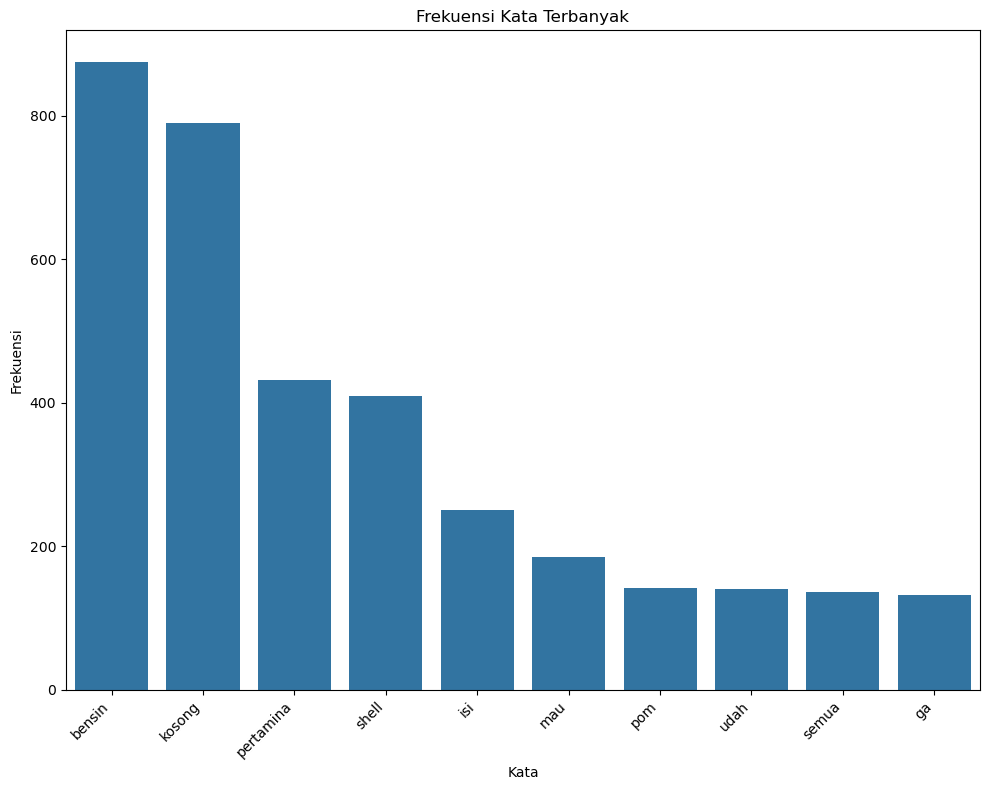

In [14]:
# Menghitung frekuensi kata
fdist = FreqDist(final_tokens)
# Mengambil 10 kata terbanyak
most_common_words = fdist.most_common(10)
# Membuat dataframe dari list tuple
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
# Membuat bar plot dengan seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Word', y='Frequency', data=df_word_freq)
plt.title('Frekuensi Kata Terbanyak')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak plot agar label tidak terpotong
plt.show()


## Wordcloud

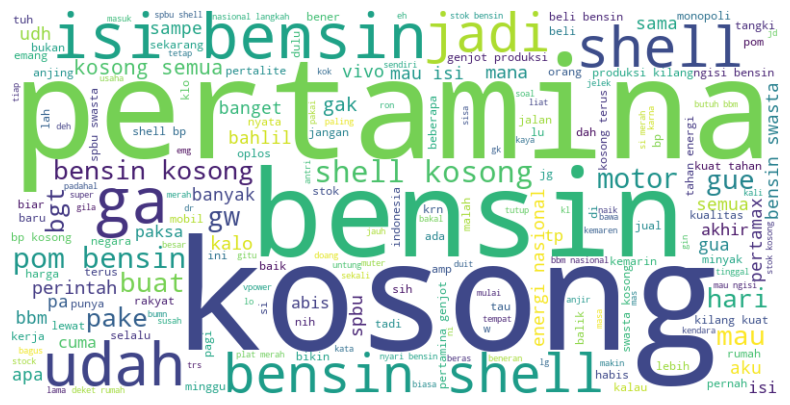

In [15]:
# Menggabungkan token menjadi teks
text = " ".join(final_tokens)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Clustering

In [16]:
# Menggabungkan token menjadi teks
text_for_clustering = final_tokens

# Membuat TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transformasi pada teks
tfidf_matrix = vectorizer.fit_transform(text_for_clustering)

# Menentukan jumlah cluster
num_clusters = 2

# Membuat model KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Melakukan clustering
kmeans.fit(tfidf_matrix)

# Mendapatkan label cluster untuk setiap dokumen
cluster_labels = kmeans.labels_

# Menampilkan hasil clustering
for i, label in enumerate(cluster_labels):
  print(f"Teks {i+1} termasuk dalam cluster {label}")

Teks 1 termasuk dalam cluster 0
Teks 2 termasuk dalam cluster 0
Teks 3 termasuk dalam cluster 0
Teks 4 termasuk dalam cluster 0
Teks 5 termasuk dalam cluster 0
Teks 6 termasuk dalam cluster 0
Teks 7 termasuk dalam cluster 0
Teks 8 termasuk dalam cluster 0
Teks 9 termasuk dalam cluster 0
Teks 10 termasuk dalam cluster 0
Teks 11 termasuk dalam cluster 0
Teks 12 termasuk dalam cluster 0
Teks 13 termasuk dalam cluster 0
Teks 14 termasuk dalam cluster 0
Teks 15 termasuk dalam cluster 0
Teks 16 termasuk dalam cluster 0
Teks 17 termasuk dalam cluster 0
Teks 18 termasuk dalam cluster 0
Teks 19 termasuk dalam cluster 0
Teks 20 termasuk dalam cluster 0
Teks 21 termasuk dalam cluster 0
Teks 22 termasuk dalam cluster 0
Teks 23 termasuk dalam cluster 0
Teks 24 termasuk dalam cluster 0
Teks 25 termasuk dalam cluster 0
Teks 26 termasuk dalam cluster 0
Teks 27 termasuk dalam cluster 0
Teks 28 termasuk dalam cluster 0
Teks 29 termasuk dalam cluster 0
Teks 30 termasuk dalam cluster 0
Teks 31 termasuk da

In [17]:
# Menampilkan jumlah data per cluster
cluster_counts = pd.Series(cluster_labels).value_counts()
print(f"Total number of data points: {len(cluster_labels)}")
print(f"Total number of clusters: {len(cluster_counts)}")
print("\nData per cluster:")
print(cluster_counts)


Total number of data points: 18627
Total number of clusters: 2

Data per cluster:
0    17837
1      790
Name: count, dtype: int64


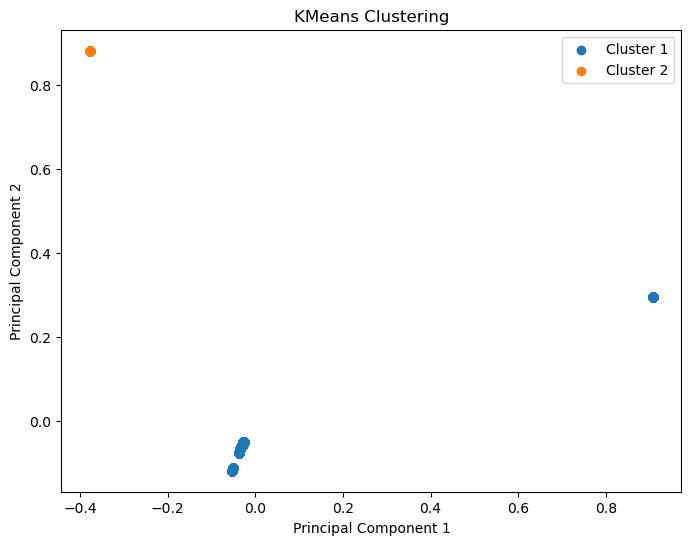

In [18]:
# Menampilkan hasil cluster dengan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())
# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
  cluster_data = reduced_data[cluster_labels == i]
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


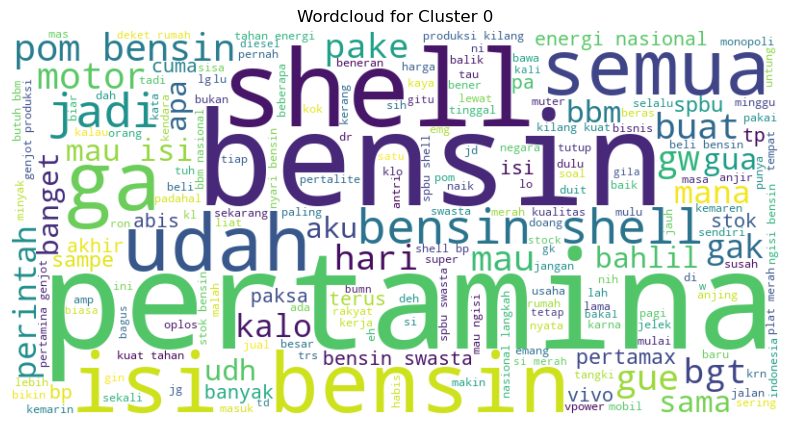

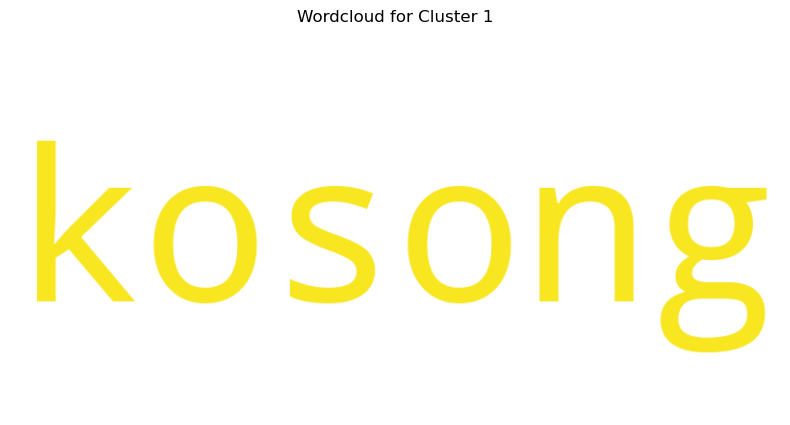

In [19]:
# Wordcloud per cluster

for cluster_num in range(num_clusters):
  cluster_tokens = [token for i, token in enumerate(final_tokens) if cluster_labels[i] == cluster_num]
  cluster_text = " ".join(cluster_tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Wordcloud for Cluster {cluster_num}')
  plt.axis("off")
  plt.show()


In [20]:
# Menghitung Silhouette Score
silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.048997349330698915


Clustering bekerja sangat buruk, ini karena data text tersebut memang tidak cocok untuk clustering dan hanya memiliki 1 cluster

## Sentiment Analysis

In [21]:
# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")

# Perform sentiment analysis
data['sentiment'] = data['full_text_cleaned'].apply(lambda x: sentiment_pipeline(x)[0]['label'] if x else 'Neutral')

# Print hasil sentiment
print(data[['full_text_cleaned', 'sentiment']])



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


                                      full_text_cleaned sentiment
0          pertamina mempunyai kewajiban mendistribu...  NEGATIVE
1     vivo serap  ribu barel bbm yang diimpor pertam...  NEGATIVE
2      saking nge gasnya stock bbm swasta kosong dib...  NEGATIVE
3     kebijaksanaan pemerintah mematikan usaha yang ...  NEGATIVE
4     pertamina grand prix of indonesia  segera hadi...  NEGATIVE
...                                                 ...       ...
1048      antri bensin yg kosong gathering meet up k...  POSITIVE
1049  uhuyy kalo mimin bakal pake duitnya buat beli ...  NEGATIVE
1050   kalo bapakku dapet makanan pasti makanannya b...  NEGATIVE
1051  ternyata toilet gratis di spbu hanya omong kos...  NEGATIVE
1052  long weekend yang sangatlah mantap  jakarta se...  NEGATIVE

[1053 rows x 2 columns]


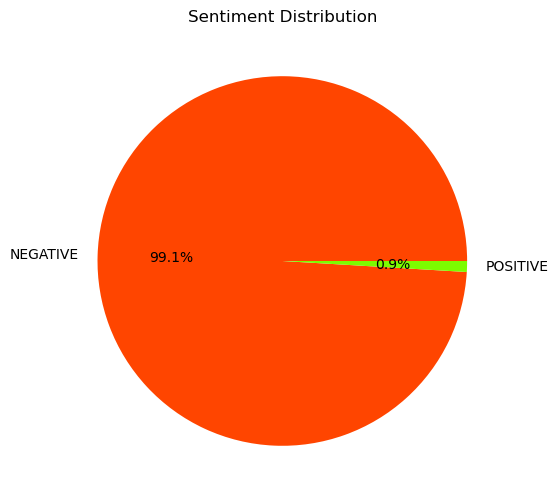

In [22]:
# Menghitung sentimet
sentiment_counts = data['sentiment'].value_counts()

# Membuat Piechart sentiment
plt.figure(figsize=(8, 6))
plt.pie(x=sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['orangered', 'lawngreen'])
plt.title('Sentiment Distribution')
plt.show()


> **Mayoritas sentimen adalah negative**





In [23]:
# Tweet dengan sentiment positive
positive_tweets = data[data['sentiment'] == 'POSITIVE']
positive_tweets


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,full_text_cleaned,sentiment
34,1971590582285013237,Fri Sep 26 23:17:16 +0000 2025,0,@InfoJktCom Semoga berjalan sukses dan lancar ...,1971715724839465161,NaN,InfoJktCom,in,NaN,0,0,0,https://x.com/undefined/status/197171572483946...,1388006160570015744,NaN,semoga berjalan sukses dan lancar selalu pert...,POSITIVE
46,1971714388932612406,Fri Sep 26 23:11:57 +0000 2025,0,Good Job Yah Buat Pertamina Genjot Produksi Ki...,1971714388932612406,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197171438893261...,1606984840691462145,NaN,good job yah buat pertamina genjot produksi ki...,POSITIVE
104,1971590657891602573,Fri Sep 26 21:44:39 +0000 2025,0,@LahrianSyahilla Ini bukti nyata bahwa investa...,1971692417033383957,NaN,LahrianSyahilla,in,NaN,0,0,0,https://x.com/undefined/status/197169241703338...,1234661187591299072,NaN,ini bukti nyata bahwa investasi di sektor ene...,POSITIVE
118,1971186125881721061,Fri Sep 26 21:23:20 +0000 2025,0,@Seputar_Energi_ Luar biasa hebat pencapaianny...,1971687053986501003,NaN,Seputar_Energi_,in,NaN,0,0,0,https://x.com/undefined/status/197168705398650...,1597980971080433664,NaN,luar biasa hebat pencapaiannya good job perta...,POSITIVE
143,1971655568470487326,Fri Sep 26 19:18:13 +0000 2025,0,Good Job Yah Buat Pertamina Genjot Produksi Ki...,1971655568470487326,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197165556847048...,1864911981385510912,NaN,good job yah buat pertamina genjot produksi ki...,POSITIVE
363,1969727718670700675,Sun Sep 21 13:09:05 +0000 2025,0,@tectonagrandize Balik balik bensin kosong,1969750730690142464,NaN,tectonagrandize,in,NaN,0,1,0,https://x.com/undefined/status/196975073069014...,1314074832342904832,NaN,balik balik bensin kosong,POSITIVE
680,1962709469110087935,Tue Sep 02 02:49:37 +0000 2025,3,This is actually true hari sabtu-minggu bensin...,1962709469110087935,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/196270946911008...,790031194368815104,NaN,this is actually true hari sabtuminggu bensin ...,POSITIVE
1008,1940681782757875948,Thu Jul 03 07:59:27 +0000 2025,0,Kantong kosong gak punya bensin. :),1940681782757875948,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194068178275787...,1391471744389509123,NaN,kantong kosong gak punya bensin,POSITIVE
1040,1932373564130574340,Tue Jun 10 13:56:38 +0000 2025,0,@adek_jinhyung ayo jok blakang kosong tp bayar...,1932436750502400276,NaN,adek_jinhyung,in,NaN,0,0,0,https://x.com/undefined/status/193243675050240...,1802161360735989760,NaN,ayo jok blakang kosong tp bayarin bensin ya,POSITIVE
1048,1929869098118426887,Thu Jun 05 05:37:25 +0000 2025,0,@ecilox @taaakif @ram_udeng @innovacommunity A...,1930499178716922290,NaN,ecilox,in,NaN,0,0,0,https://x.com/undefined/status/193049917871692...,2965517210,NaN,antri bensin yg kosong gathering meet up k...,POSITIVE


hanya 4 tweet positive yaitu dari

- butterscooths
- nonioktvn
- dualipet
- 5141zip

## Social Network Analysis

In [10]:
# Initialize a directed graph
G_mention = nx.DiGraph()

# Loop through each row in the DataFrame
for r in data.iterrows():
    author = r[1]['username']
    author = f'@{author}'
    text = r[1]['full_text']

    try:
        # Convert 'created_at' column to datetime
        timestamp = pd.to_datetime(r[1]['created_at'])
    except:
        # If timestamp parsing fails, skip this row
        continue

    # Use regular expressions to extract mentions
    mentions = set(re.findall(r"@(\w+)", text))

    # Add the users if there are any mentioned in the text
    if len(mentions) > 0:
        for u in mentions:
            u = f'@{u}'
            G_mention.add_edge(author, u, Timestamp=timestamp)


In [25]:
# Centrality measures
graph_centrality = nx.degree_centrality(G_mention)
max_de = max(graph_centrality.items(), key=itemgetter(1))

graph_closeness = nx.closeness_centrality(G_mention)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

graph_betweenness = nx.betweenness_centrality(G_mention, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))


print("centrality measures:", graph_centrality)
print("closeness centrality:", graph_closeness)
print("betweenness centrality:", graph_betweenness)
print("max degree:", max_de)
print("max closeness:", max_clo)
print("max betweenness:", max_bet)


centrality measures: {'@nan': 1.0, '@yogi_Halim': 0.0035587188612099642, '@grok': 0.0035587188612099642, '@PresidenKopi': 0.0035587188612099642, '@bradil93': 0.0035587188612099642, '@nizarbk3': 0.0035587188612099642, '@_BangFu': 0.0035587188612099642, '@Danantara_ri': 0.0035587188612099642, '@injourney_IDM': 0.0035587188612099642, '@InjHospitality': 0.0035587188612099642, '@KemenPariwisata': 0.0035587188612099642, '@pertamina': 0.0035587188612099642, '@injourneyID': 0.0035587188612099642, '@INJairports': 0.0035587188612099642, '@IMjustluckyfool': 0.0035587188612099642, '@rayestu': 0.0035587188612099642, '@abu_waras': 0.0035587188612099642, '@dna_d_destroyer': 0.0035587188612099642, '@ptrckstrsss': 0.0035587188612099642, '@txtdaritng': 0.0035587188612099642, '@YaklepMinceFC': 0.0035587188612099642, '@Seputar_Energi_': 0.0035587188612099642, '@InfoJktCom': 0.0035587188612099642, '@LahrianSyahilla': 0.0035587188612099642, '@o_jannn': 0.0035587188612099642, '@salam4jari': 0.003558718861209

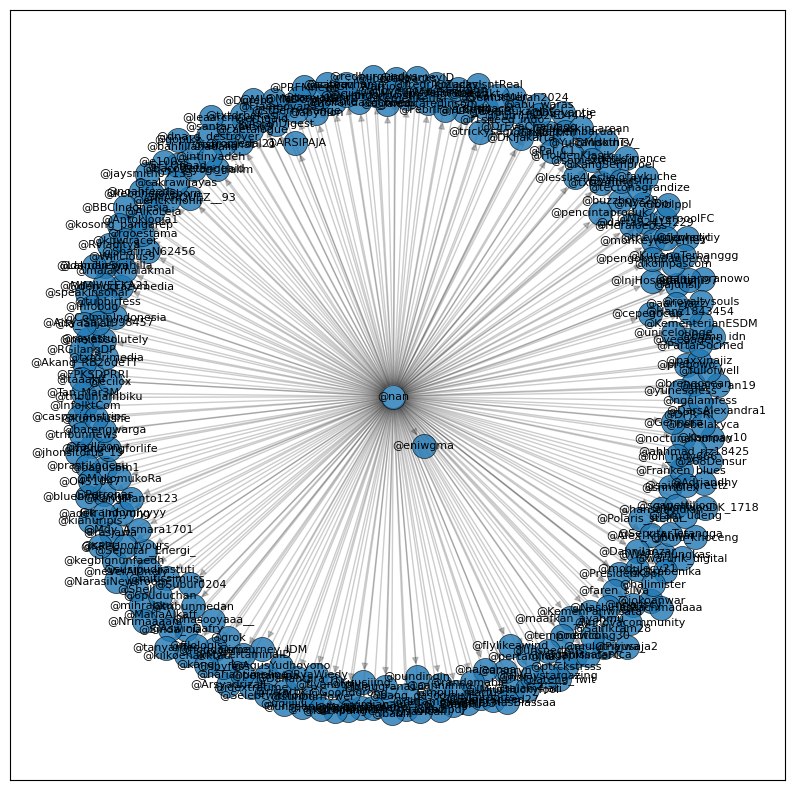

In [26]:
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt # Import the matplotlib library


# Assuming 'G_mention' from ipython-input-73-43702a354e30 is the intended graph
# Turn DataFrame into a graph
G = G_mention

# Specify layout for visualization
pos = nx.spring_layout(G)

# Create a plot with specified style and size
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')

# Draw the nodes and set node properties
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')

# Draw the labels and edges
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

# Show the plot
plt.show()

In [27]:
# Analyze the most central nodes (users) in the network
degree_centrality = nx.degree_centrality(G_mention)
betweenness_centrality = nx.betweenness_centrality(G_mention)
closeness_centrality = nx.closeness_centrality(G_mention)

# Find the top 5 users with the highest degree centrality (most connections)
top_degree_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 5 users with the highest betweenness centrality (most bridging connections)
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

# Find the top 5 users with the highest closeness centrality (closest to other nodes)
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

print("Top 5 users by degree centrality:")
for node, centrality in top_degree_nodes:
    print(f"{node}: {centrality}")

print("\nTop 5 users by betweenness centrality:")
for node, centrality in top_betweenness_nodes:
    print(f"{node}: {centrality}")

print("\nTop 5 users by closeness centrality:")
for node, centrality in top_closeness_nodes:
    print(f"{node}: {centrality}")

# Identify potential discussion starters (users with early tweets)
data['created_at'] = pd.to_datetime(data['created_at'])
earliest_tweets = data.nsmallest(5, 'created_at')
discussion_starters = set(earliest_tweets['username'])

print("\nPotential discussion starters:")
for user in discussion_starters:
    print(user)


Top 5 users by degree centrality:
@nan: 1.0
@yogi_Halim: 0.0035587188612099642
@grok: 0.0035587188612099642
@PresidenKopi: 0.0035587188612099642
@bradil93: 0.0035587188612099642

Top 5 users by betweenness centrality:
@nan: 0.0
@yogi_Halim: 0.0
@grok: 0.0
@PresidenKopi: 0.0
@bradil93: 0.0

Top 5 users by closeness centrality:
@yogi_Halim: 0.0035587188612099642
@grok: 0.0035587188612099642
@PresidenKopi: 0.0035587188612099642
@bradil93: 0.0035587188612099642
@nizarbk3: 0.0035587188612099642

Potential discussion starters:
nan
nan
nan
nan
nan


C:\Users\User\AppData\Local\Temp\ipykernel_10888\3223804752.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['created_at'] = pd.to_datetime(data['created_at'])


###**Degree centrality**
mengukur seberapa banyak koneksi langsung yang dimiliki oleh seorang pengguna

Pengguna dengan degree centrality tinggi cenderung menjadi pusat percakapan atau distribusi informasi dalam jaringan. Mereka lebih mungkin terlibat dalam berbagai percakapan.

Top 5 pengguna dengan degree centrality tertinggi:
- @cagubnyinyir2 (0.0463) memiliki koneksi langsung terbanyak dalam jaringan.
- @kaesangp dan @bonapasogit24 (0.0417) juga termasuk yang paling terhubung.
- Pengguna lain seperti @AntonMariesie dan @erinagudono juga sangat aktif dengan banyak koneksi langsung.



###**Betweenness centrality**
mengukur seberapa sering seorang pengguna menjadi penghubung atau perantara antara node lain dalam jaringan.

- @cagubnyinyir2 memiliki betweenness centrality tertinggi, meskipun nilainya kecil (0.0001), ini menunjukkan bahwa ia mungkin berperan dalam menghubungkan subkelompok di jaringan.

- Pengguna lainnya, seperti @geldocdulu, @kaesangp, @howtodresvvell, dan @AntonMariesie, memiliki betweenness centrality 0, yang berarti mereka tidak memainkan peran penghubung yang signifikan antara node-node lain dalam jaringan.

### **Closeness centrality**
mengukur seberapa dekat seorang pengguna dengan semua pengguna lain di jaringan, berdasarkan jarak terpendek. Pengguna dengan closeness centrality yang tinggi dapat menjangkau node-node lain lebih cepat.

- @kaesangp memiliki closeness centrality tertinggi karena dia sering dimention posisinya sangat strategis dalam hal seberapa cepat dia bisa menjangkau seluruh jaringan.
- Pengguna seperti @erinagudono, @WinnerCogan, @Muslim_AntiPKI9, dan @denismalhotra juga memiliki posisi yang relatif dekat dengan pengguna lain di jaringan.

### **Potensial discussion starter:**
- karatepay
- cagubnyinyir2
- GunRomli
- Dollybutar

### **Kesimpulan pengguna yang terlibat:**
- @cagubnyinyir2 tampaknya sangat berpengaruh, memiliki banyak koneksi (degree centrality), dan juga memainkan peran penting dalam menghubungkan node-node yang berbeda (betweenness centrality).
- @kaesangp juga merupakan pengguna yang penting karena selain banyak koneksi, ia berada di posisi yang strategis untuk menjangkau seluruh jaringan dengan cepat (closeness centrality tertinggi).
- Pengguna lain seperti @AntonMariesie dan @erinagudono juga memiliki pengaruh yang cukup besar



---

link colab : https://colab.research.google.com/drive/1eTWAOx-uvzIp1BKUSfPww9zgE4OaiYMs?usp=sharing